In [5]:
import numpy as np
from matplotlib import cm
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [6]:
class Easy21:

    def __init__(self, max_length=1000):
        self.max_length = max_length

    def reset(self):
        self.player_first_card_val = np.random.choice(10) + 1
        self.dealer_first_card_val = np.random.choice(10) + 1

        self.player_sum = self.player_first_card_val
        self.dealer_sum = self.dealer_first_card_val

        self.state = [self.dealer_first_card_val, self.player_sum]

        self.player_goes_bust = False
        self.dealer_goes_bust = False

        self.ret = 0
        self.terminal = False
        self.t = 0

        return self.state

    def step(self, action):
        # action 1: hit   0: stick
        # color: 1: black   -1: red
        r = 0

        ### Player hits
        if action == 1 and self.terminal == False:
            self.player_card_val = np.random.choice(10) + 1
            self.player_card_col = np.random.choice([-1, 1], p=[1./3., 2./3.])

            self.player_sum += (self.player_card_val * self.player_card_col)
            self.player_goes_bust = self.check_go_bust(self.player_sum)
            
            if self.player_goes_bust == 1:
                    r = -1
                    self.terminal = True
            
            self.t+=1
        
        ### Player sticks
        else:
            ##Dealer hits until sum >=17
            while (not self.terminal) and self.dealer_sum < 17 and self.t <= self.max_length:
                self.dealer_card_val = np.random.choice(10) + 1
                self.dealer_card_col = np.random.choice([-1, 1], p=[1./3., 2./3.])

                self.dealer_sum += (self.dealer_card_val * self.dealer_card_col)
                self.dealer_goes_bust = self.check_go_bust(self.dealer_sum)
            
                ## Dealer goes bust
                if self.dealer_goes_bust == 1:
                    r = 1
                    self.terminal = True
                    break
                    
                self.t+=1
                
            if not self.terminal:
                
                if self.player_sum > self.dealer_sum: 
                    r = 1
                    self.terminal = True
                elif self.player_sum < self.dealer_sum: 
                    r = -1
                    self.terminal = True
                else:  
                    r = 0
                    self.terminal = True

            
        if self.terminal: return 'Terminal', r, self.terminal
        else:
            self.state[1] = self.player_sum
            return self.state, r, self.terminal


    def check_go_bust(self, Sum):
        return bool(Sum > 21 or Sum < 1)

In [7]:
def coarse_coding(s, a):
    v = np.zeros(3, dtype=int)
    for i in range(3):
        if (3 * i) <= s[0] <= (3 * (i+1)): v[i] = 1

    v_ = np.zeros(6, dtype=int)
    for i in range(6):
        if (3 * i) <= s[1] <= (3 * i + 5): v_[i] = 1
    v = np.append(v, v_)

    v_ = np.zeros(2, dtype=int)
    v_[a] = 1

    return np.append(v, v_)

In [9]:
feature = np.zeros([10, 21, 2, 11])
for i in range(10):
    for j in range(21):
        for a in range(2):
            feature[i, j, a, :] = coarse_coding([i, j], a)


In [10]:
feature

array([[[[1., 0., 0., ..., 0., 1., 0.],
         [1., 0., 0., ..., 0., 0., 1.]],

        [[1., 0., 0., ..., 0., 1., 0.],
         [1., 0., 0., ..., 0., 0., 1.]],

        [[1., 0., 0., ..., 0., 1., 0.],
         [1., 0., 0., ..., 0., 0., 1.]],

        ...,

        [[1., 0., 0., ..., 1., 1., 0.],
         [1., 0., 0., ..., 1., 0., 1.]],

        [[1., 0., 0., ..., 1., 1., 0.],
         [1., 0., 0., ..., 1., 0., 1.]],

        [[1., 0., 0., ..., 1., 1., 0.],
         [1., 0., 0., ..., 1., 0., 1.]]],


       [[[1., 0., 0., ..., 0., 1., 0.],
         [1., 0., 0., ..., 0., 0., 1.]],

        [[1., 0., 0., ..., 0., 1., 0.],
         [1., 0., 0., ..., 0., 0., 1.]],

        [[1., 0., 0., ..., 0., 1., 0.],
         [1., 0., 0., ..., 0., 0., 1.]],

        ...,

        [[1., 0., 0., ..., 1., 1., 0.],
         [1., 0., 0., ..., 1., 0., 1.]],

        [[1., 0., 0., ..., 1., 1., 0.],
         [1., 0., 0., ..., 1., 0., 1.]],

        [[1., 0., 0., ..., 1., 1., 0.],
         [1., 0., 0., ..., 1

## TD(λ) 
#### the eligibility trace 
- is a short-term memory vector
- it parallels the long-term weight vector, w
- it keep tracks of which components w has contributed to in recent state valuations

- the trace indicate which components of w deserve most credit for error in the current state

#### Error
- Error is defined by moment-by-moment one-step TD error
-  δt=G(t+1) −v̂ (St,wt).
- G(t+1) is also equivalent to the sum of the returns, Rt+1, and the future value, V(St+1) * discount gamma

#### Weight vector
- each component of w is updated in proportion to the scalar TD error and it's corresponding component in the vector eligibility trace.

    - wt+1=wt + αδtzt.
  
#### The effect of lambda
- When λ=0 the trace is exactly the state-value gradient for St, and the update for w reduces to the one-step semi-gradient TD update
- When λ=1 the trace decays only according to γ and, although this is not as trivial to see, the update reduces to the MC Gradient update. 
- Intermediate values of λ represent intermediate levels of bootstrapping between these two extremes, just as intermediate values of n represent intermediate levels of bootstrapping in the n-step TD algorithm

## SARSA

We update the Q value based on the rule below:
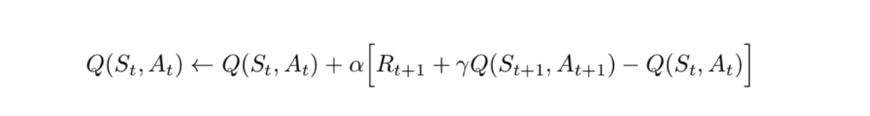


### Steps

1. Initialize Q values to some arbitrary values
2. Select an action by the epsilon greedy policy
3. Update the Q value in the previous state by following the update rule where a' is the action selected by the epsilon-greedy policy


## Eligibility trace

Eligibility trace for state s at time t is given by Et(s)

Et(s) = gamma * lambda * Et-1(s)

gamma: discount rate
lambda: trace-decay parameter

Trace for the one state visited at time t

Et(St) = gamma* lambda * Et-1(St) +1
--> accumulating trace as it accumulates each time the state is visited

#### What do eligibility traces do?

They keep a record of which states

## Eligibility trace and sarsa
- Apply the TD(Lambda) prediction method to state action pairs
- we need a trace for each state-action pair
- Let Et(s,a) denote the trace for the state-action pair s,a
- Traces can be accumulating, dutch or replacing


As a result

Qt+1(s,a) = Qt(s,a) + alpha * delta(t) * Et(s,a)

where
delta(t) = Rt+1 + gamma* Qt(St+1,At+1) - Qt(St,At)

----

Weights update

wt+1 = wt + alpha * delta * eligtrace

eligtrace = gamma * lambda * eligtrace  + gradient (St,wt)

gradient(st,wt) = change in value functiong per time step?

estimation = np.sum(self.weights[activeTiles])
        delta = self.stepSize * (target - estimation)
        self.weights += self.stepSize*delta*self.z
    
    
feature = np.zeros([10, 21, 2, 11])
for i in range(10):
    for j in range(21):
        for a in range(2):
            feature[i, j, a, :] = coarse_coding([i, j], a)

            
for i_dec in range(len(Decay)):
    w = np.zeros(11)
    for i_epi in range(n_episodes):
        w = SARSA_lambda_func_approx(w, Decay[i_dec])
    Q_SARSA_approx = np.zeros([10, 21, 2])
    for i in range(10):
        for j in range(21):
            for a in range(2):
                Q_SARSA_approx[i, j, a] = np.dot(w, feature[i, j, a, :])

    IF METHOD == ACCUMULATING
    
    trace = trace*gamma*lambda

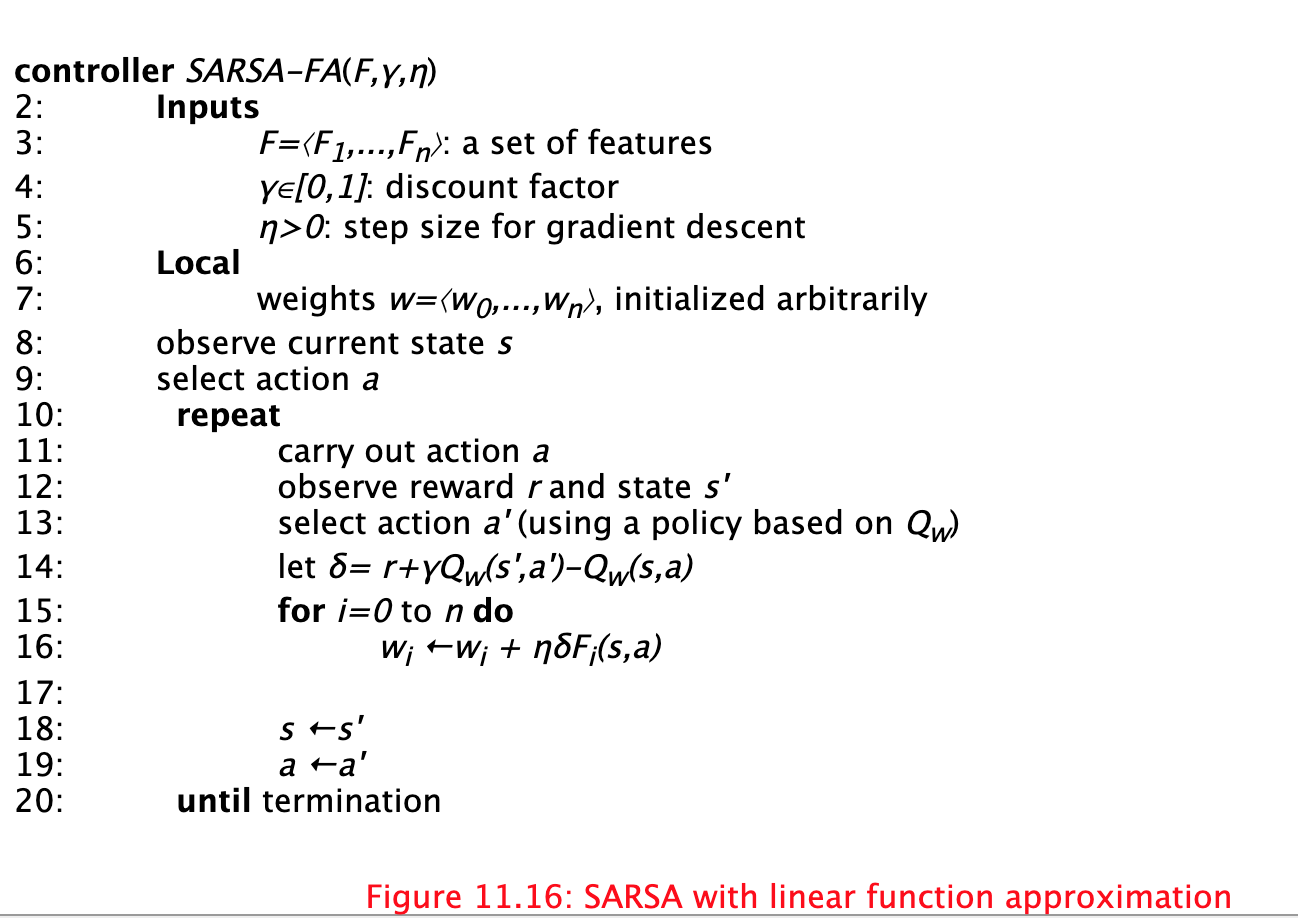

In [ ]:
def SARSA(Q_SAR, Returns, count_state, count_state_action):
    
    epsilon = 0.05
    -
    ##Step size of gradient descent
    stepsize = 0.01

    ##Initialize the weights arbitrarily
    elig_trace = np.zeros(len(w))

    ## =============================================================== ##
      
    # Reset the environment and pick the first action
    state = env.reset()


    # Set up trackers
    actions = []
    rewards = []
    s = env.reset()
    states = [s]
 

    while True:
        action_greedy = Q_TD[s[0]-1, s[1]-1, :].argmax()
        count_state[s[0]-1, s[1]-1] += 1
        action = np.random.choice([action_greedy, 1 - action_greedy], p=[1. - epsilon/2., epsilon/2.])
        actions.append(action)
        
        #carry out action a
        s, r, term = env.step(action=action)
        
        #observe reward r
        rewards.append(r)
        
        if term: 
            Q_new =0
            break
         
        #observe state s'
        else: states.append(s)
            
    for t in range(len(states)):
        
        current_state = states[t-1]
        next_state = states[t]
        
        current_action = actions[t-1]
        next_action = actions[t]
        
        delta = r + Q(next_state,next_action) - Q(current_state,current_action)
        
        for i in range(len(w)):
            w[i] = w[i] + decay*delta*feature[current_state,current_action]
        
        
        ## Calculate TD error
         td_error =r + Q_new - Q[dealer_id, player_id, action(a)]
            
        #update eligibility trace
        elig_trace[dealer id, player_id, action(a)] += 1
        
        #Update Q and E for all state-action pairs
        
        Q[] += stepsize*td_error*E
        E[] *= gamma*lam
        
        #update s and 
        s = s_new
        
        if not s_new.is_terminal
            a = a_new
        
        
        def update_V(self):
            for dealer_id in range(V.shape[0]):
                for player_id in range(V.shape[1]):
                    self.V[dealer_id,player_id] = max(self.Q[dealer_id, player_id,:])
    
       delta = self.stepSize * (target - estimation)
        self.weights += self.stepSize*delta*self.z
    

    ## =============================================================== ##
    return w

In [12]:
def SARSA(Q, n_episodes, stepsize):
    
    epsilon = 0.05
    
    #Initialise the state value function to zero
    V = np.zeros([10,21])
    
    # Initialize state-action pair to zero
    Q = np.zeros([10, 21, 2])
    
     # N(s,a) is the number of times that action a has been selected from state s.
    Nsa = np.zeros([10,21,2]) 
        
    # N(s) is the number of times that
    Ns =np.zeros([10,21])
    
    def select_action(state):
        
        action_greedy = Q[state[0]-1,state[1]-1,:].argmax()
        action = np.random.choice([action_greedy, 1 - action_greedy], p=[1. - epsilon/2., epsilon/2.])
        
        return action
    
    for episode in range(n_episodes):
        
        #random start
        s = env.reset()
        
        a = select_action(s)
        
        while not term:
            
            #update N(s,a)
            Nsa[s[0]-1,s[1]-1,a] +=1
            
            #excute action a, observe s_new and r
            s_new,r,done = env.step(a)
            
            dealer_id = s[0]-1
            player_id = s[1]-1
                    
            if env.check_term(s_new) == True:
                Q_new =0
                term = True
                
            else:
                
                a_new = select_action(s_new)
                
                dealer_id_new = s[0]-1
                player_id_new = s[1]-1
                        
                Q_new = Q[dealer_id_new, player_id_new, a_new]
            
            Q += stepsize*(r + self.gamma*Q_new - self.Q[dealer_id,player_id,a])
            
            s = s_new
            a = a_new
    
    return Q

In [31]:
## SARSA(lambda) function approximation -- MSE vs. lambda
n_episodes = 1000
env = Easy21()

Decay = np.arange(0, 1.1, 0.1)
mse_Q_approx = np.zeros(len(Decay))

n_state_action = 10 * 21 * 2

feature = np.zeros([10, 21, 2, 11])
for i in range(10):
    for j in range(21):
        for a in range(2):
            feature[i, j, a, :] = coarse_coding([i, j], a)

            
for i_dec in range(len(Decay)):
    w = np.zeros(11)
    for i_epi in range(n_episodes):
        w = SARSA_lambda_func_approx(w, Decay[i_dec])
    Q_SARSA_approx = np.zeros([10, 21, 2])
    for i in range(10):
        for j in range(21):
            for a in range(2):
                Q_SARSA_approx[i, j, a] = np.dot(w, feature[i, j, a, :])

    mse_Q_approx[i_dec] = np.sum(np.square(Q_SARSA_approx - Q_MC)) / float(n_state_action)

print("The best lambda is:", Decay[mse_Q_approx.argmin()])

NameError: name 'tiles' is not defined

In [ ]:
## SARSA(lambda) function approximation -- MSE vs. lambda plot
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
ax.plot(Decay, mse_Q_approx, linewidth=2)

ax.set_xlabel("Alpha")
ax.set_ylabel("mse of Q")
fig.tight_layout()

plt.show()

In [ ]:
## SARSA(lambda) function approximation -- learning curve when lambda = 0 or 1
mse_Q_approx_decay_0 = np.zeros(n_episodes)


## lambda=0
w = np.zeros(11)
Q_SARSA_approx = np.zeros([10, 21, 2])
for i_epi in range(n_episodes):
    w = SARSA_lambda_func_approx(w, 0.)

    for i in range(10):
        for j in range(21):
            for a in range(2):
                Q_SARSA_approx[i, j, a] = np.dot(w, feature[i, j, a, :])

    mse_Q_approx_decay_0[i_epi] = np.sum(np.square(Q_SARSA_approx - Q_MC)) / float(n_state_action)

## lambda =1
mse_Q_approx_decay_1 = np.zeros(n_episodes)

w = np.zeros(11)
Q_SARSA_approx = np.zeros([10, 21, 2])
for i_epi in range(n_episodes):
    w = SARSA_lambda_func_approx(w, 1.)

    for i in range(10):
        for j in range(21):
            for a in range(2):
                Q_SARSA_approx[i, j, a] = np.dot(w, feature[i, j, a, :])

    mse_Q_approx_decay_1[i_epi] = np.sum(np.square(Q_SARSA_approx - Q_MC)) / float(n_state_action)

In [ ]:
## SARSA(lambda) function approximation -- learning curve when lambda = 0 or 1 plot
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)
ax.plot(np.arange(n_episodes), mse_Q_approx_decay_0, linewidth=2, c='olive', label='lambda = 0')
ax.plot(np.arange(n_episodes), mse_Q_approx_decay_1, linewidth=2, c='salmon', label='lambda = 1')

ax.set_xlabel("episode")
ax.set_ylabel("mse of Q")
ax.legend(loc='upper right', fontsize=10)

plt.show()